In [1]:
# 출처 https://datascienceschool.net/view-notebook/7d82087c31d64fe491dc74e1d5953ca2/
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None,
                 n_estimators=50,
                 learning_rate=1.,
                 algorithm='SAMME.R',
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error

In [163]:
import pandas as pd 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [166]:
X_train = pd.read_csv('mul_5_X.csv', delimiter = ',')
Y_train = pd.read_csv('mul_5_Y.csv', delimiter = ',')

In [167]:
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1]
Y_train = pd.factorize(Y_train)[0]

In [168]:
X_train = StandardScaler().fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [169]:
X_train.shape, Y_train.shape

((657547, 48), (657547,))

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.1, random_state=42)

In [171]:
x_train.shape, y_train.shape

((591792, 48), (591792,))

In [175]:
model = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=0), n_estimators=5)
model = MyAdaBoostClassifier(GaussianNB(), n_estimators=5)
model.fit(x_train, y_train)

MyAdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
           learning_rate=1.0, n_estimators=5, random_state=None)

In [176]:
y_predict = model.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = model.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0

0.9089190120853273
0.9072465972169417


In [177]:
print(confusion_matrix(y_test, y_predict))

[[5957    0    0    0    0    0    0    0    0    0    0]
 [   0 5773    0    0    0    0    0    0    0    0    0]
 [   0    0 5982    0    0    0    0    0    0    0    0]
 [   0    0    0 5989    0    0    0    0    0    0    0]
 [   0    0    0    0 5942    0    0    0    0    0    0]
 [   0    0    0    0    0 6009    0    0    0    0    0]
 [   0    0    0    0    0    0 6080    0    0    0    0]
 [   0    0    0    0    0    0    0    0 6099    0    0]
 [   0    0    0    0    0    0    0    0 5979    0    0]
 [   0    0    0    0    0    0    0    0    0 5876    0]
 [   0    0    0    0    0    0    0    0    0    0 6069]]


In [123]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29945
           1       1.00      1.00      1.00     24775

   micro avg       1.00      1.00      1.00     54720
   macro avg       1.00      1.00      1.00     54720
weighted avg       1.00      1.00      1.00     54720



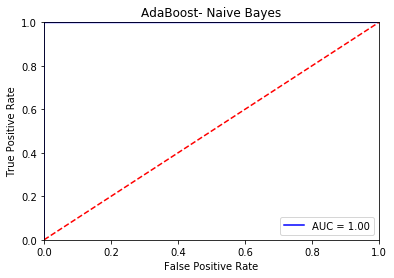

In [124]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('AdaBoost- Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
